# 🔥 4 Pandas Functions That I Wish I Knew Earlier 🔥

### Import Dependencies & Load Data Set

In [49]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## 🚀 No. 1

**`pandas.DataFrame.query`**
> Query the columns of a DataFrame with a boolean expression.<br><br>
> *Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html*

### Without Variables

In [50]:
mask = (df['sex']=='Male') & (df['size'] >2)
df[mask].head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4


In [51]:
df.query('sex=="Male" & size>2').head(10)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4
17,16.29,3.71,Male,No,Sun,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3
23,39.42,7.58,Male,No,Sat,Dinner,4
25,17.81,2.34,Male,No,Sat,Dinner,4
31,18.35,2.50,Male,No,Sat,Dinner,4


### With Variables

In [52]:
days = ["Sat", "Sun"]
df.query('sex=="Male" & size>2 & day==@days').head(10)

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
13,18.43,3.00,Male,No,Sun,Dinner,4
17,16.29,3.71,Male,No,Sun,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3
23,39.42,7.58,Male,No,Sat,Dinner,4
25,17.81,2.34,Male,No,Sat,Dinner,4
31,18.35,2.50,Male,No,Sat,Dinner,4


## 🚀 No. 2

**`pandas.DataFrame.nsmallest`**<br>
**`pandas.DataFrame.nlargest`**

> Return the first n rows with the smallest/largest values in columns, in ascending order.<br><br>
> Documentation:
> - *nsmallest: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html*
> - *nlargest: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html*

#### nlargest

In [53]:
df.sort_values(by=['total_bill'], ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [54]:
df.nlargest(5, 'total_bill')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


#### nsmallest

In [55]:
df.nsmallest(3, 'tip')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1
92,5.75,1.0,Female,Yes,Fri,Dinner,2
111,7.25,1.0,Female,No,Sat,Dinner,1


## 🚀 No. 3

**`pandas.DataFrame.groupby`**
> Group DataFrame using a mapper or by a Series of columns.<br><br>
> *Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html*

#### Groupby: Single Column

In [56]:
df.groupby(by='sex').mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


#### Groupby: Multiple Columns

In [57]:
df.groupby(by=['sex', 'smoker']).sum()

total_bill     tip  size
sex    smoker                          
Female No          977.68  149.77   140
       Yes         593.27   96.74    74
Male   No         1919.75  302.00   263
       Yes        1337.07  183.07   150

#### Groupby: Different Aggregation Methods

In [58]:
df.groupby(by=['sex', 'smoker']).agg(['sum', 'mean'])

total_bill                tip           size          
                     sum       mean     sum      mean  sum      mean
sex    smoker                                                       
Female No         977.68  18.105185  149.77  2.773519  140  2.592593
       Yes        593.27  17.977879   96.74  2.931515   74  2.242424
Male   No        1919.75  19.791237  302.00  3.113402  263  2.711340
       Yes       1337.07  22.284500  183.07  3.051167  150  2.500000

#### Groupby: Different Aggregation Methods for individual columns

In [59]:
agg_criteria = {'total_bill': 'sum', 
                'tip': 'mean'}

df.groupby(by=['sex', 'smoker']).agg(agg_criteria)

total_bill       tip
sex    smoker                      
Female No          977.68  2.773519
       Yes         593.27  2.931515
Male   No         1919.75  3.113402
       Yes        1337.07  3.051167

#### Groupby: Different Aggregation Methods for individual columns & resetting index

In [60]:
df.groupby(by=['sex', 'smoker'], as_index=False).agg(agg_criteria)

,sex,smoker,total_bill,tip
0,Female,No,977.68,2.773519
1,Female,Yes,593.27,2.931515
2,Male,No,1919.75,3.113402
3,Male,Yes,1337.07,3.051167


## 🚀 No. 4

**`pandas.cut`**
> Bin values into discrete intervals.<br><br>
> *Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html*

#### Distribution of tips

<AxesSubplot:>

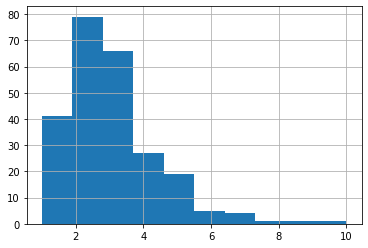

In [61]:
df['tip'].hist()

#### Custom tip categories using pandas.cut

In [62]:
bins = [0, 2, 4, float('inf')]
labels = ['small','medium','high']
df['tip_category'] = pd.cut(df['tip'], bins=bins, labels=labels)
df.head(15)

,total_bill,tip,sex,smoker,day,time,size,tip_category
0,16.99,1.01,Female,No,Sun,Dinner,2,small
1,10.34,1.66,Male,No,Sun,Dinner,3,small
2,21.01,3.50,Male,No,Sun,Dinner,3,medium
3,23.68,3.31,Male,No,Sun,Dinner,2,medium
4,24.59,3.61,Female,No,Sun,Dinner,4,medium
5,25.29,4.71,Male,No,Sun,Dinner,4,high
6,8.77,2.00,Male,No,Sun,Dinner,2,small
7,26.88,3.12,Male,No,Sun,Dinner,4,medium
8,15.04,1.96,Male,No,Sun,Dinner,2,small
9,14.78,3.23,Male,No,Sun,Dinner,2,medium
